In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import glob
import os

In [3]:
data_path = r'Y:\All Undergrads\Jack Letendre\Connector Mapping\27Jan2025_testing'

# compile file paths 
file_paths = glob.glob(data_path + '/*.csv')
file_paths

['Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode1.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode2.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode3.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode4.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode4_redo.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode5.csv',
 'Y:\\All Undergrads\\Jack Letendre\\Connector Mapping\\27Jan2025_testing\\electrode6.csv']

In [4]:
df = pd.DataFrame()

for file in file_paths:
    df_name = os.path.basename(file).split('.')[0]
    temp_df = pd.read_csv(file)
    temp_df['file'] = df_name
    df = pd.concat([df, temp_df])

df = df.reset_index(drop=True)
df

,Channel Number,Channel Name,Port,Enabled,Impedance Magnitude at 1000 Hz (ohms),Impedance Phase at 1000 Hz (degrees),Series RC equivalent R (Ohms),Series RC equivalent C (Farads),file
0,D-000,D-000,Port D,1,429.0,-12,419.0,0.000002,electrode1
1,D-001,D-001,Port D,1,442.0,-12,433.0,0.000002,electrode1
2,D-002,D-002,Port D,1,420.0,-12,411.0,0.000002,electrode1
3,D-003,D-003,Port D,1,446.0,-11,438.0,0.000002,electrode1
4,D-004,D-004,Port D,1,421.0,-12,413.0,0.000002,electrode1
...,...,...,...,...,...,...,...,...,...
219,D-027,D-027,Port D,1,462.0,-3,461.0,0.000006,electrode6
220,D-028,D-028,Port D,1,426.0,-3,426.0,0.000007,electrode6
221,D-029,D-029,Port D,1,430.0,-3,430.0,0.000008,electrode6
222,D-030,D-030,Port D,1,459.0,-3,458.0,0.000006,electrode6


Text(0, 0.5, 'Impedance Magnitude (kohms)')

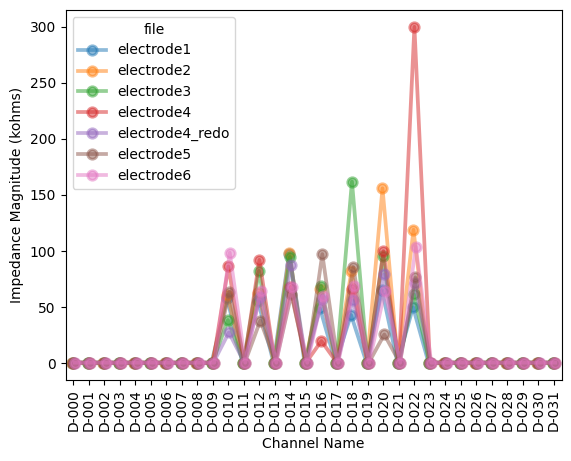

In [5]:
# plot the data

sns.pointplot(data=df, x='Channel Name', y=df['Impedance Magnitude at 1000 Hz (ohms)'].values/1000, hue='file', dodge=True, alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Impedance Magnitude (kohms)')